# Project Description

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features-

1.	W - This indicates the number of Wins credited to a pitcher: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work.
2.	R - This indicates Runs scored. A run is scored when a player advances around first, second and third base and returns safely to home plate, touching the bases in that order, before three outs are recorded and all obligations to reach base safely on batted balls are met or assured: number of times a player crosses home plate.
3.	AB - This means At bat or time at bat. It's is a batter's turn batting against a pitcher: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction.
4.	H - This means Hit. It's also called a "base hit", is credited to a batter when the batter safely reaches or passes first base after hitting the ball into fair territory, without the benefit of either an error or a fielder's choice: reaching base because of a batted, fair ball without error by the defense.
5.	2B - This means the act of a batter striking the pitched ball and safely reaching second base without being called out by the umpire, without the benefit of a fielder's misplay (see error) or another runner being put out on a fielder's choice. A double is a type of hit (the others being the single, triple and home run) and is sometimes called a "two-bagger" or "two-base hit": hits on which the batter reaches second base safely without the contribution of a fielding error.
6.	3B - This measns a Triple.It's is the act of a batter safely reaching third base after hitting the ball, with neither the benefit of a fielder's misplay nor another runner being put out on a fielder's choice. A triple is sometimes called a "three-bagger" or "three-base hit": hits on which the batter reaches third base safely without the contribution of a fielding error.
7.	HR - This means Home runs. It's scored when the ball is hit in such a way that the batter is able to circle the bases and reach home plate safely in one play without any errors being committed by the defensive team. A home run is usually achieved by hitting the ball over the outfield fence between the foul poles (or hitting either foul pole) without the ball touching the field: hits on which the batter successfully touched all four bases, without the contribution of a fielding error.
8.	BB - This means Base on balls (also called a "walk"). It occurs in baseball when a batter receives four pitches that the umpire calls balls, and is in turn awarded first base without the possibility of being called out: hitter not swinging at four pitches called out of the strike zone and awarded first base.
9.	SO - Also denoted as "K" means Strikeout. It occurs when a batter accumulates three strikes during a time at bat. It usually means that the batter is out: number of batters who received strike three.
10.	SB - This means Stolen base. It occurs when a runner advances to a base to which they are not entitled and the official scorer rules that the advance should be credited to the action of the runner: number of bases advanced by the runner while the ball is in the possession of the defense.
11.	RA - This means Run Average. It refer to measures of the rate at which runs are allowed or scored.
12.	ER - This means Earned run. It refers to any run that was fully enabled by the offensive team's production in the face of competent play from the defensive team: number of runs that did not occur as a result of errors or passed balls.
13.	ERA - This means Earned Run Average. It refers to the average of earned runs allowed by a pitcher per nine innings pitched (i.e. the traditional length of a game). It is determined by dividing the number of earned runs allowed by the number of innings pitched and multiplying by nine: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched.
14.	CG - This means Complete Game. It's the act of a pitcher pitching an entire game without the benefit of a relief pitcher. A pitcher who meets this criterion will be credited with a complete game regardless of the number of innings played: number of games where player was the only pitcher for their team.
15.	SHO - This means Shutout. It refers to the act by which a single pitcher pitches a complete game and does not allow the opposing team to score a run: number of complete games pitched with no runs allowed.
16.	SV - This means Save. It's credited to a pitcher who finishes a game for the winning team under certain prescribed circumstances: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings.
17.	E - This means Errors. It's an act, in the judgment of the official scorer, of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out. The term error is sometimes used to refer to the play during which an error was committed: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result.



In [2]:
#Lets  start with importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

# 1.Importing data

In [3]:
#importing data
df =  pd.read_csv("baseball.csv")

In [4]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


# 2. Check data type of each column

In [6]:
# check datatype of each colunm
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

# No need to change the datatype, they are accurate so we will skip the data conversion step, Now we will see  EDA

In [8]:
df.shape

(30, 17)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


# 3. Checking Null Values in DataFrame

In [10]:
# checking Null Values in DataFrame
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

# There are no null values in the dataset

# 4. check the duplicate

In [11]:
duplicate = df[df.duplicated()]
print("Duplicated Rows :")

#print the resultant Dataframe
duplicate

Duplicated Rows :


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E


# There is no duplicate values in the dataset

# 5.check the descriptive statistics about data set

In [15]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


# understanding the columns name

R: Runs

AB: At Bats

H: Hits

28: Doubles

38: Triples

HR: Homerunns

BB: Walks

SO: Strikeouts

SB: Stolen Bases

RA: Runs Allowed

ER: Earned Runs

ERA: Earned Run Average(ERA)

CG: Shutouts

SH: Saves

SV: Complete Games

E: Errors

W: Win
        

# 6.Performing EDA

In [18]:
def EDA(df,i): # create a funtion
    plt.figure(figsize=(20,5),facecolor='#FFCBA4')
    plt.subplot(1,3,1)
    sns.histplot(x=i,data=df,kde=True)
    plt.subplot(1,3,2)
    sns.regplot(x=i,y='W',data=df)
    plt.subplot(1,3,3)
    sns.boxplot(y=i,data=df)
    plt.show()

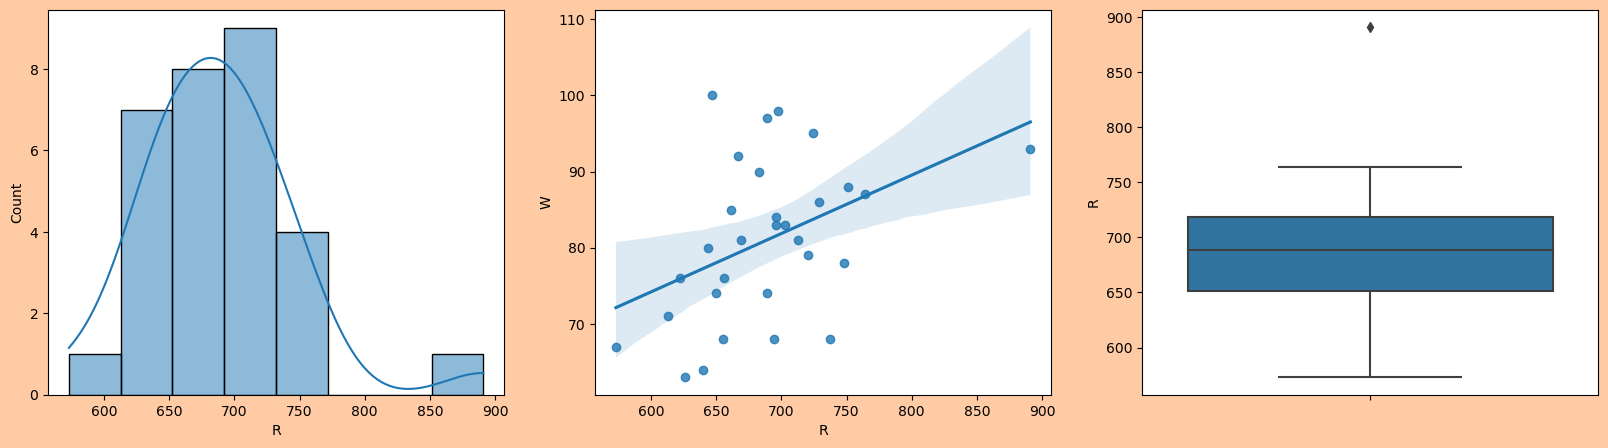

In [19]:
EDA(df,'R')

# Observation:
1. Run and win are linearly correlated
2. There are outliers present between 850 and 900

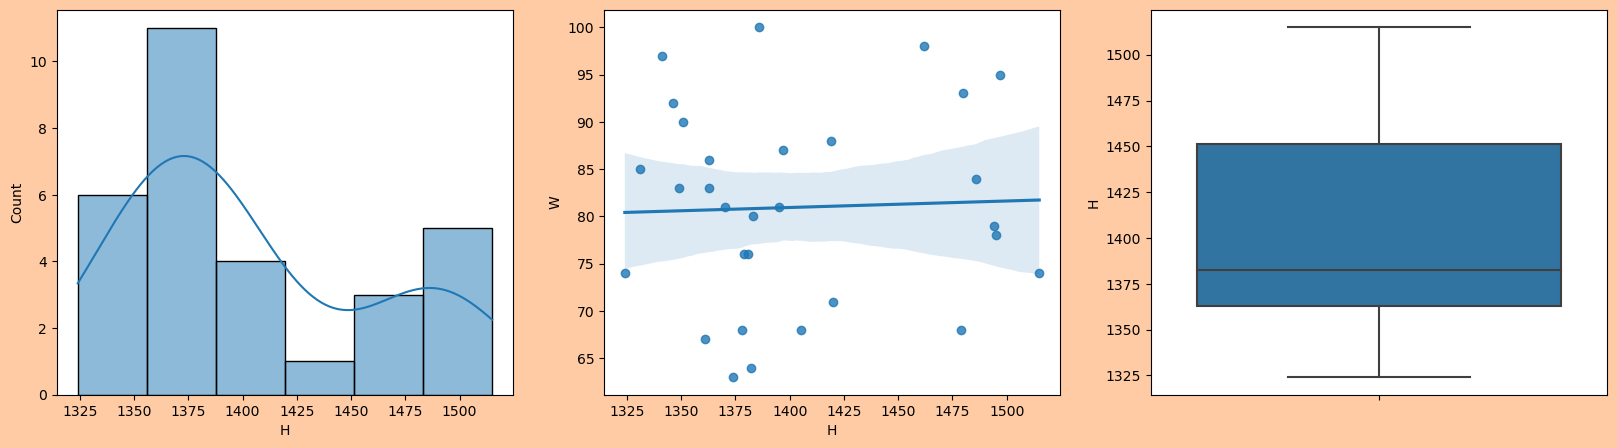

In [20]:
EDA(df,'H')

# Observation:
1.less correlated

2.no outliers present

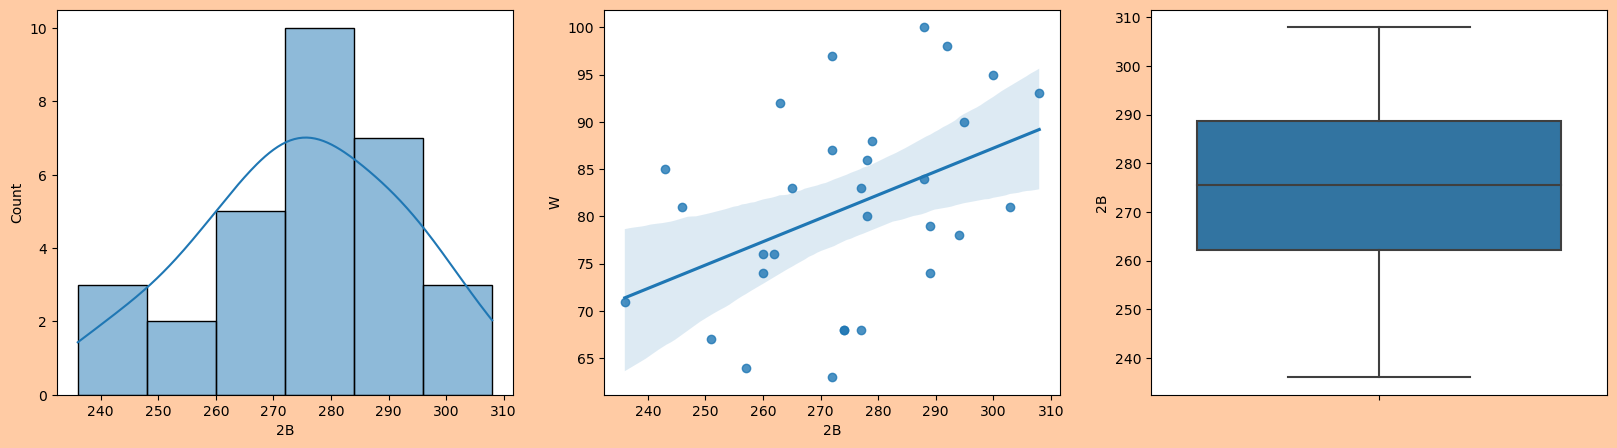

In [21]:
EDA(df,'2B')

# Observation:
1.Highly correlated
2.no outliers present

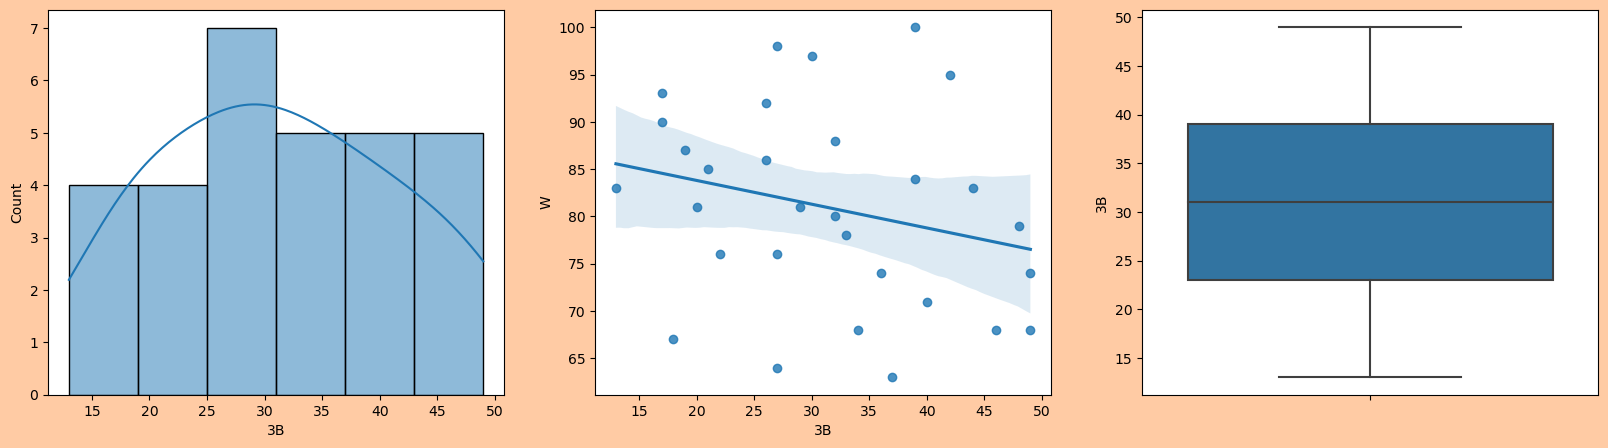

In [22]:
EDA(df,'3B')

# Observation:
1.Negative Correlation

2.no outliers present

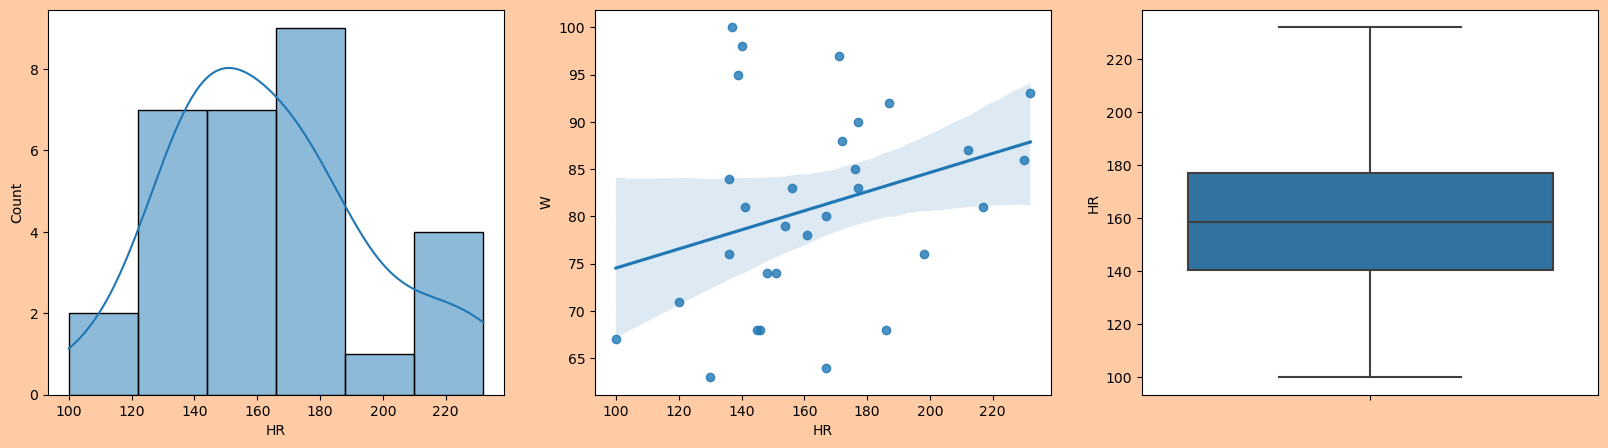

In [23]:
EDA(df,'HR')

# Observation:
1.Less +ve correlation

2.no outliers present

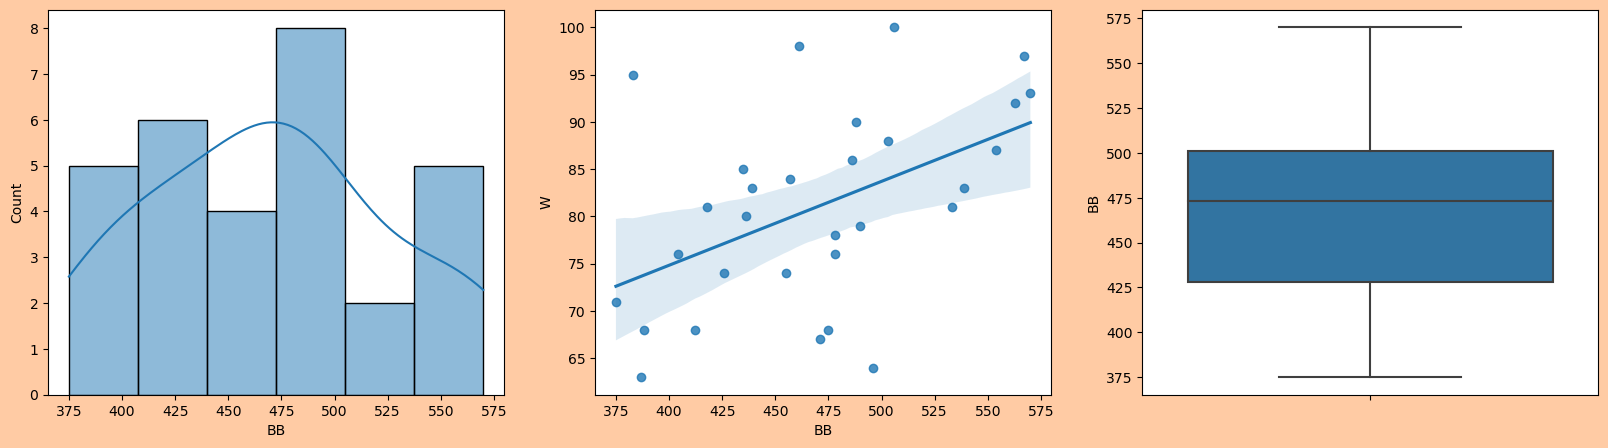

In [24]:
EDA(df,'BB')

# Observation:
1.strong correlation

2.no outliers present

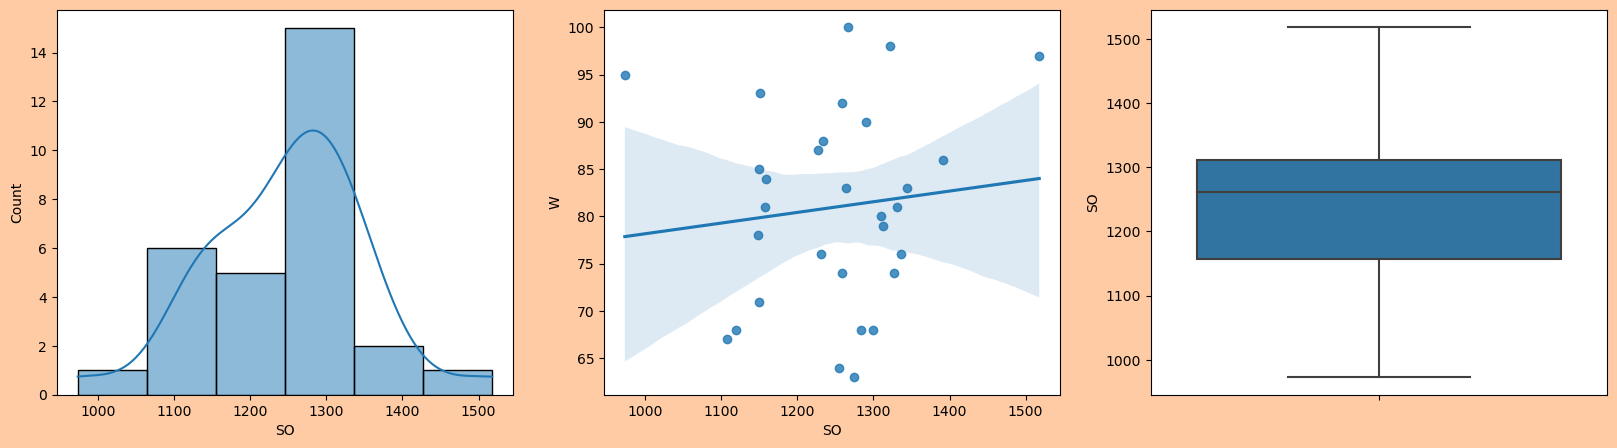

In [25]:
EDA(df,'SO')

# Observation:
1.very less correlation

2.no outliers present

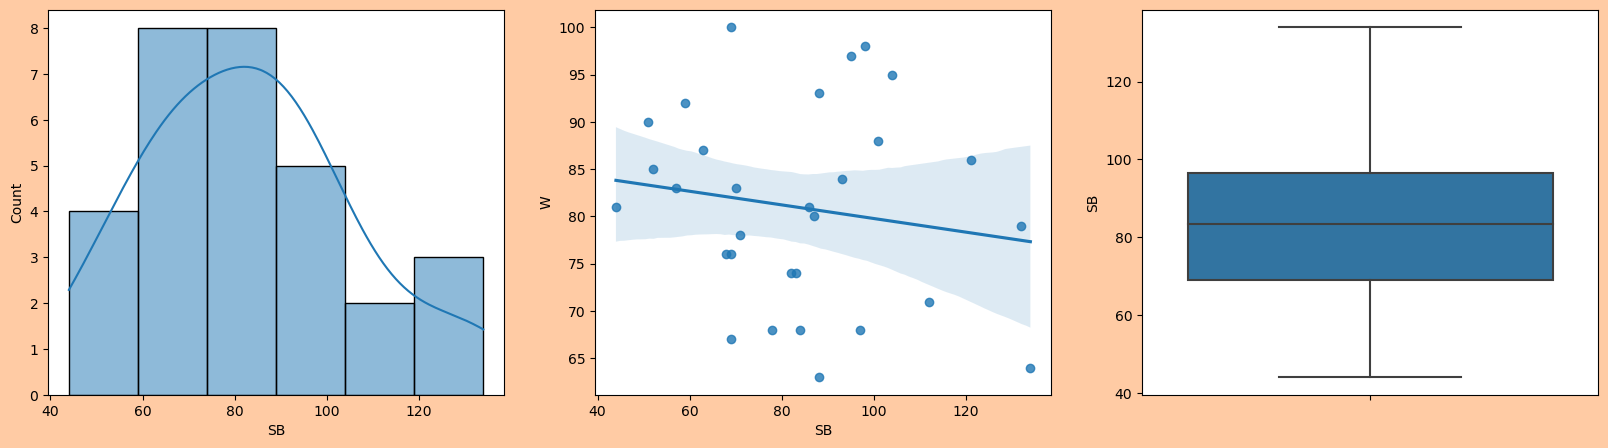

In [26]:
EDA(df,'SB')

# Observation:
1.no correlation

2.no outliers present

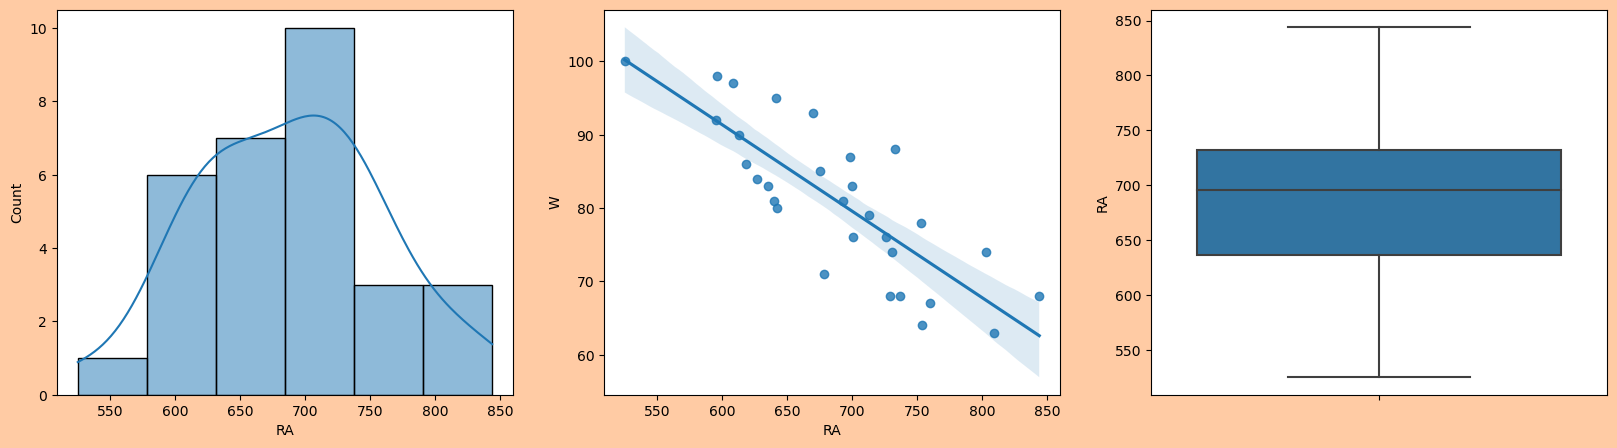

In [27]:
EDA(df,'RA')

# Observation:
1.Highly correlation

2.no outliers present

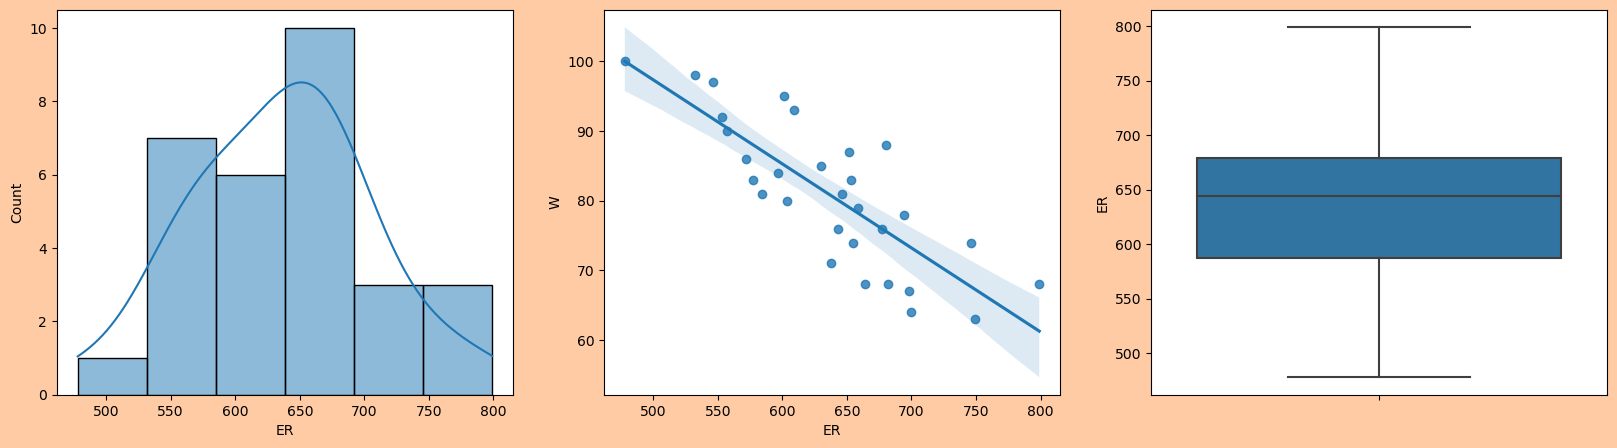

In [28]:
EDA(df,'ER')

# Observation:
1.Highly correlation

2.no outliers present

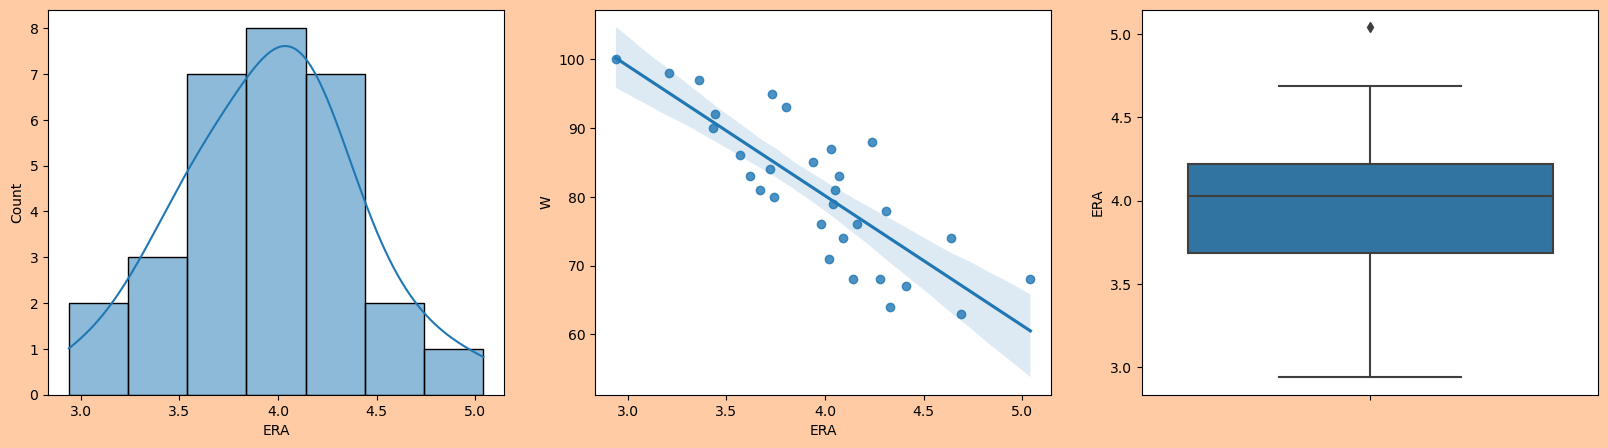

In [29]:
EDA(df,'ERA')

# Observation:
1.Highly correlation

2.no outliers present

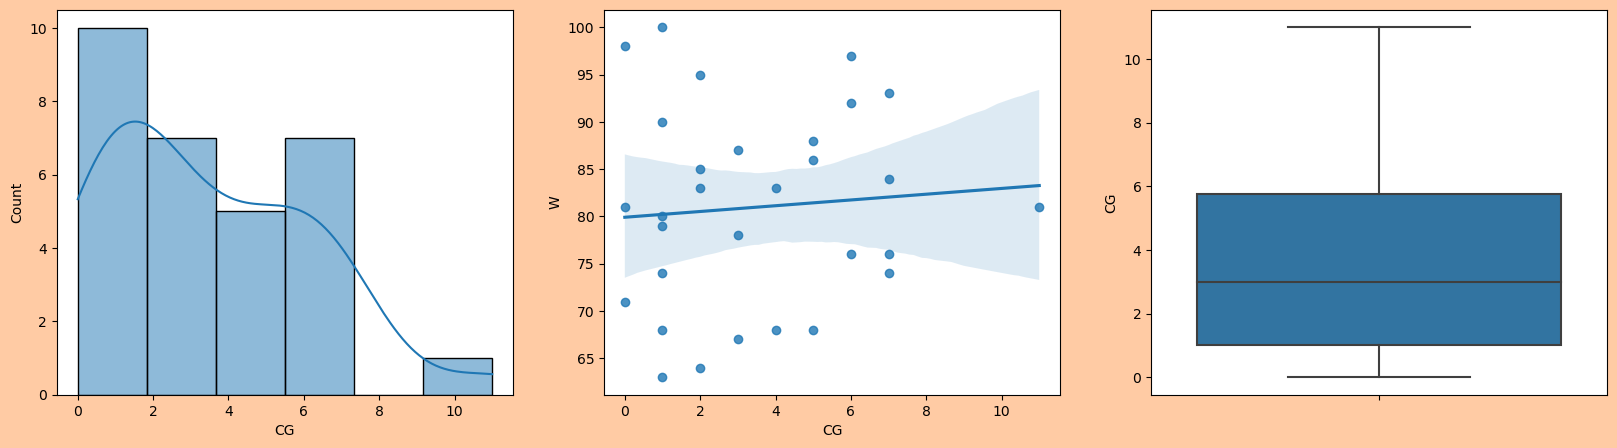

In [31]:
EDA(df,'CG')

# Observation:
1.no correlation

2.no outliers present

3.data is right skewed

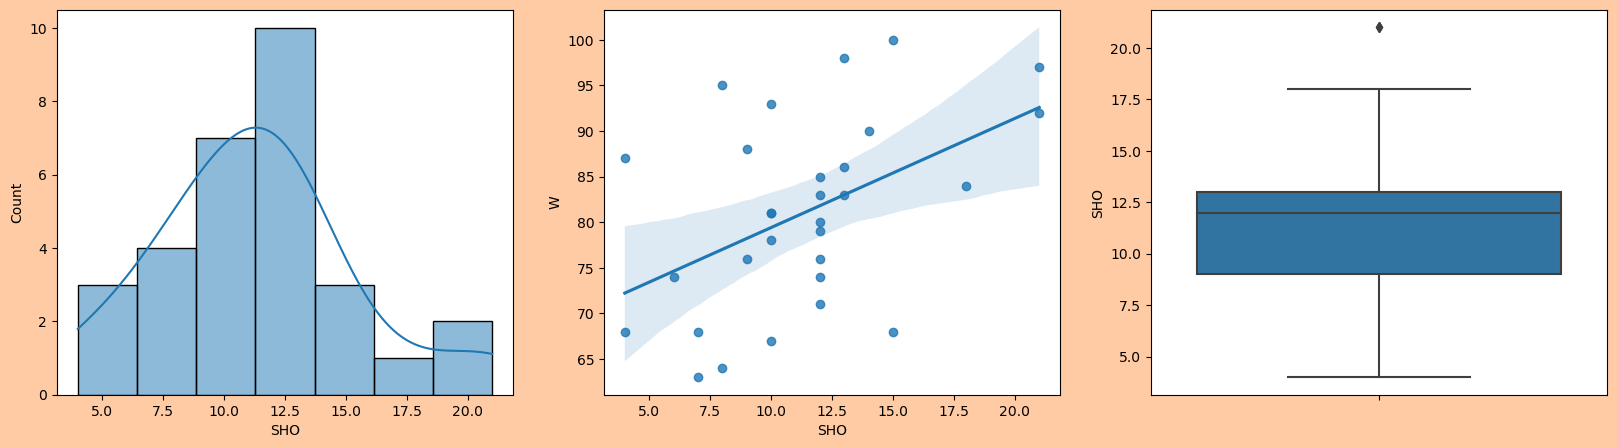

In [32]:
EDA(df,'SHO')

# Observation:
1.There is correlation

2.minor outliers present

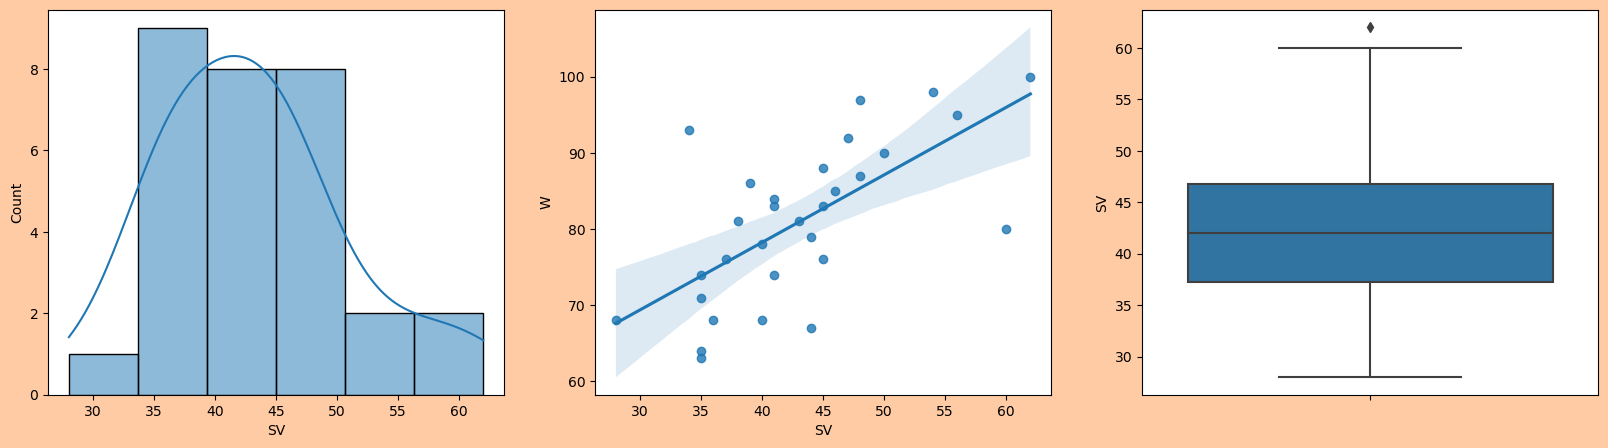

In [34]:
EDA(df,'SV')

# Observation:
1.There is correlation

 2.minor outliers present

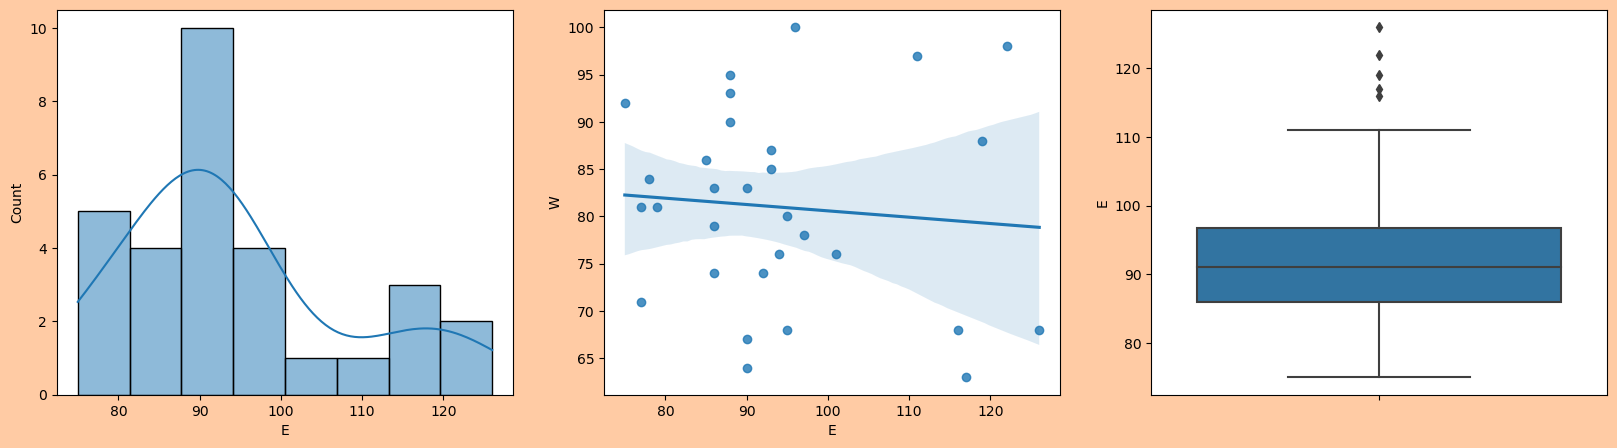

In [35]:
EDA(df,'E')

# Observation:
1.There is no correltion

2.some outliers present

# Based on our observation we can say that There is positive correlation of (R:runs,HR:Home runs,2b:doubles,SV:Saves,CG:Shutouts)with W: win and negative correlation with 
SB:Stolen bases,Ra:Runs Allowed,ER:Earned Runs

# 7.Removing the Outliers by using Zscore method

In [36]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
df1=df[(z<3).all(axis=1)]
print("Percentage of loss of data by zscore is :",(df.shape[0]-df1.shape[0])/df.shape[0])

Percentage of loss of data by zscore is : 0.03333333333333333


# 8.Separating features and label

In [37]:
f = df1.drop('W',axis=1) #f for features
l = df1.W #1 for label

# 9.Checking for the multicollinearity

In [45]:
#Checking for the multicollinearity
#Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def CalculateVIF(Data):
    # Calculating VIF
    vif = dict()
    vif["FeatureColumns"] = Data.columns
    vif["VIF"] = [variance_inflation_factor(Data.values, i ) for i in range (Data.shape[1])]
    return (pd.DataFrame(vif))
CalculateVIF(df1)

,FeatureColumns,VIF
0,W,1136.419542
1,R,3372.620602
2,AB,5149.560597
3,H,4646.411583
4,2B,1109.169779
5,3B,35.766244
6,HR,289.402974
7,BB,295.570400
8,SO,400.617550
9,SB,28.931744


In [46]:
#Plotting the heatmap

<AxesSubplot:>

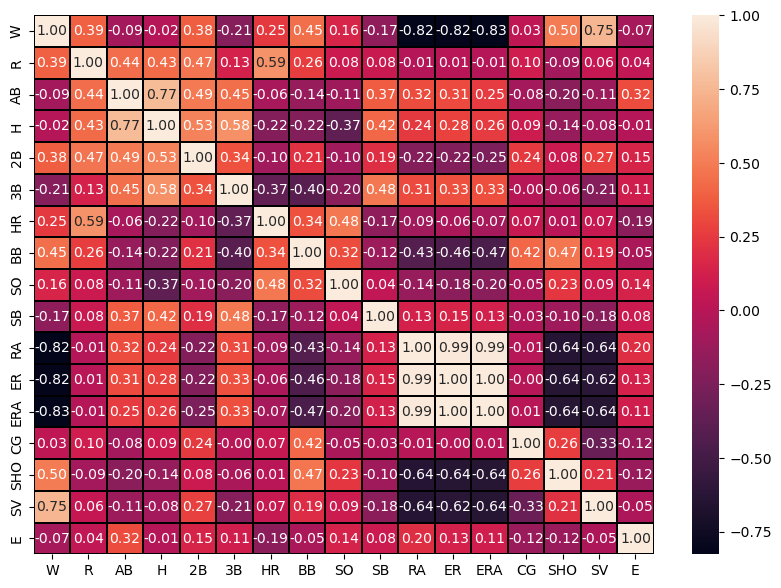

In [48]:
plt.figure(figsize = (10,7)) # plotting the heat map
sns.heatmap(df1.corr(),annot = True,linewidths=0.1,linecolor="Black",fmt="0.2f")

# 10.with the following function we can select highly correlated features

In [51]:
def correlation(dataset, threshold):
    col_corr =set() # SEt of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold: # we are interested in absolute coefficent values
                colname = corr_matrix.columns[i] # getting the name of the columns
                col_corr.add(colname)
    return col_corr

In [52]:
corr_features = correlation(df1, 0.5)
len(set(corr_features))

9

In [53]:
corr_features # highly correlated features name

{'2B', '3B', 'ER', 'ERA', 'H', 'HR', 'RA', 'SHO', 'SV'}

# Correlation of column with the target column

In [54]:
df1.corr()['W'].sort_values()

ERA   -0.826952
RA    -0.823176
ER    -0.815308
3B    -0.206737
SB    -0.169503
AB    -0.085780
E     -0.072858
H     -0.018360
CG     0.029594
SO     0.156469
HR     0.245697
2B     0.384886
R      0.390451
BB     0.447513
SHO    0.497526
SV     0.749290
W      1.000000
Name: W, dtype: float64

In [60]:
f.corrwith(l) # Correlation of column with the target column

R      0.390451
AB    -0.085780
H     -0.018360
2B     0.384886
3B    -0.206737
HR     0.245697
BB     0.447513
SO     0.156469
SB    -0.169503
RA    -0.823176
ER    -0.815308
ERA   -0.826952
CG     0.029594
SHO    0.497526
SV     0.749290
E     -0.072858
dtype: float64

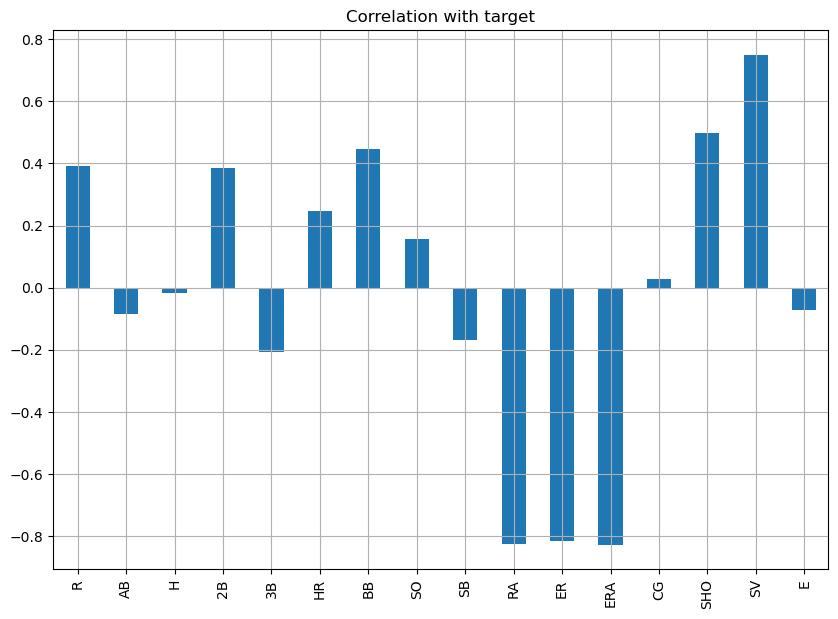

In [61]:
f.corrwith(l).plot(kind = 'bar', grid = True,figsize=(10,7), # Correlation with label by graphical representation
title = 'Correlation with target')
plt.show()

In [62]:
df2 = df1.drop(labels=corr_features,axis=1)

In [63]:
CalculateVIF(df2)

,FeatureColumns,VIF
0,W,95.444183
1,R,332.077292
2,AB,445.912600
3,BB,136.135889
4,SO,173.859694
5,SB,15.692887
6,CG,3.416512
7,E,51.623016


# 11. Data Scaling Standard Scaler

In [64]:
from sklearn.preprocessing import StandardScaler


In [65]:
scale = StandardScaler() # only to the feature

In [66]:
f1 = scale.fit_transform(f)

In [67]:
f1.shape

(29, 16)

In [68]:
f.shape

(29, 16)

In [69]:
f1

array([[ 0.95939835,  0.83008422,  1.73830631,  1.55653766,  1.01084549,
        -0.76586314, -1.53635899, -2.72762331,  0.9059529 , -0.66451353,
        -0.51114812, -0.51138828, -0.50148589, -0.81326172,  1.64315663,
        -0.47109143],
       [ 0.33114717, -0.70283074, -0.93869788,  0.20117132,  1.20891656,
        -0.18138864, -0.49502051,  0.12189552, -0.58531515,  0.15463823,
         0.23216082,  0.23895226, -0.50148589,  0.15929869,  0.21100645,
        -0.61489829],
       [-0.27466646, -1.10025314, -0.10665604,  1.73332457, -0.2766165 ,
        -0.69710144,  1.25294051, -0.9258657 ,  0.11645805, -0.67839746,
        -0.75415297, -0.64380131,  2.85461197, -0.32698152, -0.70036184,
        -1.1182223 ],
       [-1.32923093,  0.23395062, -0.35988616, -0.8006212 , -0.47468758,
        -0.8690057 , -1.14585706, -0.20124579, -0.6730368 ,  0.16852216,
         0.08921679,  0.04033271,  1.36301292, -0.57012162, -0.83055731,
         0.46365315],
       [ 0.17408438,  1.25589393,  2

# 12. Split data into train and test

In [75]:
maxAccu=0
lrm=LinearRegression()
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(f1,l,test_size = 0.3,random_state=i)
    lrm = LinearRegression()
    lrm.fit(x_train, y_train)
    pred= lrm.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
print("Best accuracy is ", maxAccu, 'on random state', maxRS)
        

Best accuracy is  0.9125242537047673 on random state 104


In [77]:
x_train,x_test,y_train,y_test = train_test_split(f1,l,test_size=0.3,random_state=104)

# Model Instantiating and training

In [78]:
lrm = LinearRegression()
lrm.fit(x_train, y_train)

LinearRegression()

In [79]:
df.tail(2)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [80]:
#Since we have alredy fit the scaler , we can transformt the data
print('Chance of Admission is ', lrm.predict (scale.transform ([[650, 5457, 1324, 260, 36, 148, 426, 1327, 82, 737, 655, 4.09, 1, 6, 41, 92]])))

Chance of Admission is  [80.93725803]


# Lets check how well model fits on the train data

In [81]:
# Adjusted R2 score # .score is nothing but adjusted R2 score
# when we have mutiple feature that time we check Adjusted R2 score
lrm.score(x_train,y_train)

0.9474734932435736

# Lets check how wekk model fits the test data

In [82]:
lrm.score(x_test,y_test)

0.9125242537047673

#  Now our model  fits 94% for training data and 91% for testing dataset

In [84]:
y_pred = lrm.predict(x_test)
y_pred

array([90.34536321, 60.90903157, 65.63334636, 83.54419271, 78.17145526,
       87.66184042, 69.07278284, 95.42178544, 79.75048809])

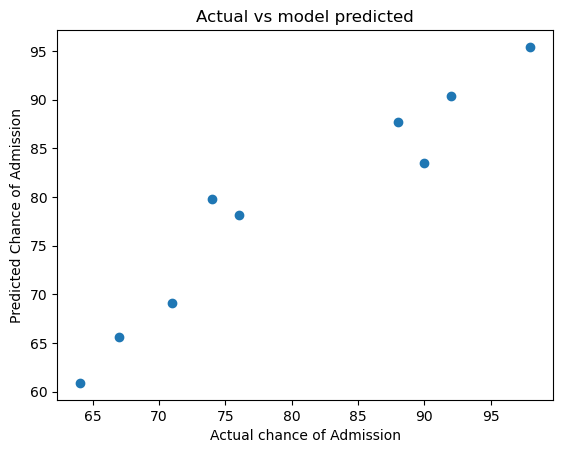

In [85]:
plt.scatter (y_test,y_pred)
plt.xlabel('Actual chance of Admission')
plt.ylabel('Predicted Chance of Admission')
plt.title('Actual vs model predicted')
plt.show()

In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [87]:
y_pred  = lrm.predict(x_test)

In [88]:
#MAE
mean_absolute_error(y_test,y_pred)

2.814844532802153

In [91]:
#MSE
mean_squared_error(y_test,y_pred)

11.566237565702984

In [92]:
#RMSE 
np.sqrt(mean_squared_error(y_test,y_pred))

3.4009171653692163

# Let's see if our model is overfitting our training data.
Regularization
.. It is a technique to handle overfiitng and underfitting

Types of Regularization
1. Lasso(Least Absolute Shrinkage and Selection Operator)/L1 form
2. Rigge(L2 form)

L1..>It will try to omit the variabes or columns internally which are not contributing to Y.

L2..>It will minimize the diff b/w -ve and the +ve coeff of any Dataset

In [94]:
from sklearn.linear_model import Ridge, Lasso , RidgeCV, LassoCV

# 1. Lasso(Least Absolute Shrinkage and Selection Operator)/L1 form

In [95]:
# LassoCV will return best alpha after max iteration
# Normalize is subtracting the mean and divinding by the L2-norm
lasscv = LassoCV (alphas = None , max_iter = 100, normalize = True)# normalize is similar to standarlized the data
lasscv.fit(x_train, y_train)

LassoCV(max_iter=100, normalize=True)

# 1.1) best alpha parameter/best learning rate

In [97]:
alpha = lasscv.alpha_
alpha

0.23783485423242867

1.2) SO Now tha we have best parameter , Lets use  Lasso Regression and see how well our data has filterd before

In [102]:
lasso_reg = Lasso (alpha)
lasso_reg. fit(x_train, y_train)

Lasso(alpha=0.23783485423242867)

1.3) Lets use Lasso regression score

In [103]:
lasso_reg.score(x_test,y_test)

0.9118503099095717

# 2. Using Ridge regression model
RidgeCV will return best alpha and coefficients after performing 10 cross validations

In [105]:
ridgecv = RidgeCV (alphas = np.arange (0.001,0.1,0.01), normalize = True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [106]:
ridgecv.alpha_

0.09099999999999998

In [109]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.09099999999999998)

In [110]:
ridge_model.score(x_test, y_test)

0.9135872039276434

# Conclusion : We came around same r2 square using Ridge regression as well . SO
    it is safe to say there is no overfitting
1.lasso_reg.scor = 0.911

2.ridge_model.score = 0.91

3.regression.score = 0.91

So, we can see and say say by using differnt type od regularization,we still are getting the same r2 score.
That means our Model has been weel Training over the Training data and There is no overfitting.

# Now we can save the model and later we can use it for prediction

In [112]:
import pickle

In [113]:
#saving the model to the local file system
pickle.dump(lrm,open('lrm_model','wb'))

In [114]:
print('x train shape:', x_train.shape)
print('x test shape',x_test.shape)
print('\n')
print('y train shape:', y_train.shape)
print('y test shape', y_test.shape)

x train shape: (20, 16)
x test shape (9, 16)


y train shape: (20,)
y test shape (9,)


# Building the multiple model

In [117]:
#Linear model
lrm = LinearRegression()
lrm.fit(x_train,y_train)
predln =lrm.predict(x_test)
print('r2 score is :', round((r2_score(y_test,predln)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predln)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predln)),3))


r2 score is : 0.913
RMSE: 3.401
mean absolute error: 2.815


In [118]:
#lasso model
ls = Lasso(alpha=0.001)
ls.fit(x_train,y_train)
predls=ls.predict(x_test)
print('r2 score is :', round((r2_score(y_test,predls)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predls)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predls)),3))

r2 score is : 0.883
RMSE: 3.928
mean absolute error: 3.115


In [119]:
#Ridge model
rd=Ridge(alpha = 0.001)
rd.fit(x_train,y_train)
predrd=rd.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predrd)),3))
print('RMSE:', round(np.sqrt(mean_squared_error(y_test,predrd)),3))
print('mean absolute error:', round((mean_absolute_error(y_test,predrd)),3))

r2 score is : 0.912
RMSE: 3.408
mean absolute error: 2.712


In [121]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [126]:
rf = RandomForestRegressor (n_estimators=1995)
rf.fit(x_train, y_train)
predrf=rf.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predrf)),3))
print('RMSE:', round(np.sqrt(mean_squared_error(y_test,predrf)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predrf)),3))

r2 score is : 0.619
RMSE: 7.099
mean absolute error: 5.516


In [128]:
#Ridge model
rd=Ridge(alpha=0.1)
rd.fit(x_train,y_train)
predrd=rd.predict(x_test)
print("r2 score is:", round((r2_score(y_test,predrd)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predrd)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predrd)),3))

r2 score is: 0.914
RMSE: 3.378
mean absolute error: 2.661


In [130]:
svr = SVR()
svr.fit(x_train, y_train)
predsvr=svr.predict(x_test)
print("r2 score is :", round((r2_score(y_test,predsvr)),3))
print("RMSE:",round(np.sqrt(mean_squared_error(y_test,predsvr)),3))
print('mean absolute error:', round((mean_absolute_error(y_test,predsvr)),3))

r2 score is : 0.09
RMSE: 10.968
mean absolute error: 10.189


In [133]:
#models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# model selction
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error,r2_score

In [135]:
lr = LinearRegression()
dtr = DecisionTreeRegressor()
knr = KNeighborsRegressor()
svr = SVR()
rfr=RandomForestRegressor()
lasso=Lasso()
ridge=Ridge()

In [136]:
list1=[lr,dtr,knr,svr,rfr,lasso,ridge]

In [138]:
myscore=0
maxrs=0
print(lr)
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(f1,l,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    score=lr.score(x_train,y_train)
    if score>myscore:
        myscore=score
        maxrs=i
print("Best Score: ", myscore,"\nRandom State: ", maxrs)

LinearRegression()
Best Score:  0.9996553824097767 
Random State:  128


In [139]:
myscore=0
maxrs=0
print(dtr)
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(f1,l,test_size=0.30,random_state=i)
    dtr.fit(x_train,y_train)
    score=dtr.score(x_train,y_train)
    if score>myscore:
        myscore=score
        maxrs=i
print("Best Score: ", myscore,"\nRandom State: ", maxrs)
    

DecisionTreeRegressor()
Best Score:  1.0 
Random State:  1


In [140]:
myscore=0
maxrs=0
print(knr)
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(f1,l,test_size=.30,random_state=i)
    knr.fit(x_train,y_train)
    score=knr.score(x_train,y_train)
    if score>myscore:
        myscore=score
        maxrs=i
print("Best Score: ", myscore, "\nRandom State: ", maxrs)


KNeighborsRegressor()
Best Score:  0.8542377075548736 
Random State:  64


In [141]:
myscore=0
maxrs=0
print(svr)
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(f1,l,test_size=0.30,random_state=i)
    svr.fit(x_train,y_train)
    score=svr.score(x_train,y_train)
    if score>myscore:
        myscore=score
        maxrs=i

print("Best Score :", myscore, "\nRandom State: ", maxrs)

SVR()
Best Score : 0.30999208845551185 
Random State:  31


In [145]:
myscore=0
maxrs=0
print(rfr)
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(f1,l,test_size=0.30,random_state=i)
    rfr.fit(x_train,y_train)
    score=rfr.score(x_train,y_train)
    if score>myscore:
        myscore=score
        maxrs=i
print("Best Score :", myscore , "\nRandom State", maxrs)

RandomForestRegressor()
Best Score : 0.9740355053378636 
Random State 109


In [146]:
myscore=0
maxrs=0
print(lasso)
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(f1,l,test_size=0.30,random_state=i)
    lasso.fit(x_train,y_train)
    score=lasso.score(x_train,y_train)
    score=lasso.score(x_train,y_train)
    if score>myscore:
        myscore=score
        maxrs=i
print("Best Score: ", myscore, "\nRandom State", maxrs)
        


Lasso()
Best Score:  0.9501592261621875 
Random State 123


In [148]:
myscore=0
maxrs=0
print(ridge)
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(f1,l,test_size=0.30,random_state=i)
    ridge.fit(x_train,y_train)
    score=ridge.score(x_train,y_train)
    if score>myscore:
        myscore=score
        maxrs=i
        
print("Best Score : ", myscore, "\nRandom State: " , maxrs)

Ridge()
Best Score :  0.9908320994016027 
Random State:  91
